In [1]:
from sympy import init_session
from sympy import div, QQ
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display
import pandas as pd

import numpy as np

from sympy.calculus.util import continuous_domain



init_session()

a, b, c, d = symbols('a b c d', real = True)
from docparts import añadir_ejercicios, doc_ejer, escribir_preambulo, escribir_ejercicios, escribir_fin

df_ejercicios = pd.DataFrame()

fichero = 'autoev32'
titulo = 'Autoevaluación '
curso = '1BC'


x,y = symbols('x, y', real=True)

import matplotlib.pyplot as plt
from matplotlib import style
#style.use('ggplot')
style.use('seaborn-whitegrid')


%matplotlib inline


IPython console for SymPy 1.4 (Python 3.6.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [2]:
#

def trozos(f):
    # Función que devuelve el extremo superior de los tramos, los límites laterales, y el valor de la función
    sol = []
    for i,s  in enumerate(f.args):
        if(i<len(f.args)-1):
            extremo = f.args[i][1].as_set().sup
            #display(extremo)
            #display(s)
            #display(limit(f.args[i][0],x,extremo, dir='-'))
            #display(limit(f.args[i][0],x,extremo, dir='+'))
            #display(f.subs(x,extremo))
            sol.append((extremo, limit(f.args[i][0],x,extremo, dir='-'), limit(f.args[i+1][0],x,extremo, dir='+'),f.subs(x,extremo)))        
    return sol    

def estudio(f) :
    # Estudio en una función a trozos
    
    set = S.Reals
    conj_singular = S.EmptySet
    for j, t in enumerate(f.args) :
        #display(singularities(t[0],x))
        #conj_singular = Union(conj_singular,singularities(t[0],x))
        #display(Union(conj_singular,singularities(t[0],x)))
        #conj_singular = Union(conj_singular,Complement(S.Reals,continuous_domain(t[0],x,S.Reals)))
        #conj_singular = Union(conj_singular,Intersection(t[1].as_set(),Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set2 = Intersection(set,t[1].as_set())
        conj_singular = Union(conj_singular,Intersection(set2,Complement(S.Reals,continuous_domain(t[0],x,S.Reals))))
        set = Complement(S.Reals,t[1].as_set())
        
    sol = r"Singularidades de las expresiones analíticas: $"+ latex(conj_singular)+"$"  
    sol += r".\\ Posibles discontinuidades en los extremos de los trozos:"

    xs = []
    estudio = []

    for j, t in enumerate(trozos(f)) :
        xs.append(str(t[0]))
        if (t[1]==t[2]) :
            estudio.append(r"\\En {} es continua ya que hay límite y $\lim = f({})={}$".format(t[0],t[0],t[3]))
            display(r"En $x_0={}$ hay límite y f({})={}".format(t[0],t[0],t[3]))
        else :
            estudio.append(r"\\En {} no es continua porque no existe límite. Límites laterales: ${}$ y ${}$".format(t[0], latex(t[1]), latex(t[2])))
            display(r"En {} no existe límite. Límites laterales: {} y  {}".format(t[0], t[1], t[2]))

    sol+=', '.join(xs)+r"."+'. '.join(estudio)
    return(sol)
 
def asintotas(f) :
    # Igual usar singularities mejor: asintotas, verticales, horizontales y oblícuas (a,b) en oo y -oo
    asint = []
    asintex = r'Asíntotas:\\'
    asint.append([(i,limit(f,x,i)) for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals))])
    asintex += ', '.join(r'$x='+str(i)+r'$\\' for i in list(S.Reals - continuous_domain(f,x,domain=S.Reals)))
    if abs(limit(f,x,oo)) != oo:
        asintex += r'$y='+latex(limit(f,x,oo))+r'$\\'
    if abs(limit(f,x,-oo)) != oo:
        asintex += r'$y='+latex(limit(f,x,-oo))+r'$\\'
  
    asint.append([(oo,limit(f,x,oo)), (-oo,limit(f,x,-oo))])
    oblicuas=[]
    if abs(limit(f/x,x,oo)) != oo :
        oblicuas.append((oo,limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        #display(latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo)))
        asintex += r'$y='+latex(limit(f/x,x,oo)*x+limit(f-limit(f/x,x,oo)*x,x,oo))+r'$ \\'
    if abs(limit(f/x,x,-oo)) != oo :
        oblicuas.append((-oo,limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo)))
        asintex += r'$y='+latex(limit(f/x,x,-oo)*x+limit(f-limit(f/x,x,-oo)*x,x,-oo))+r'$ \\'
    asint.append(oblicuas)
    return asint,asintex


**Halla analíticamente el dominio de las siguientes funciones:**

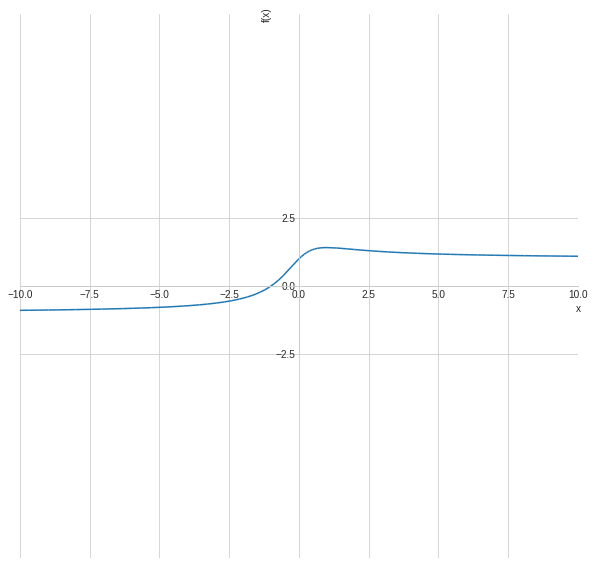

$f(x)=\frac{x+1}{\sqrt{x^2+1}}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, \infty\right)$

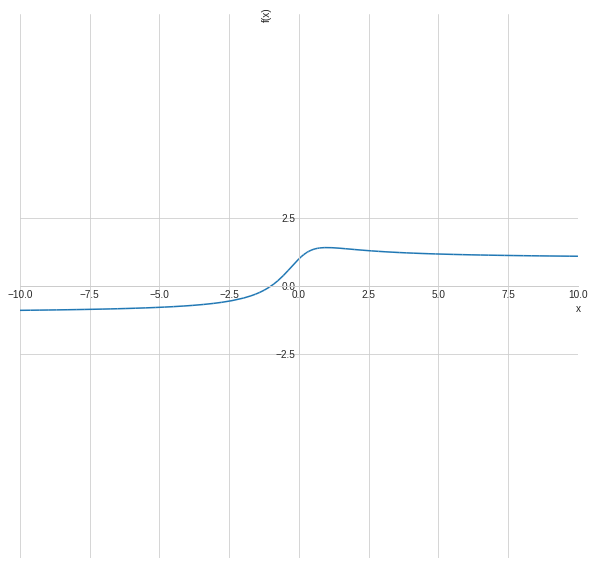

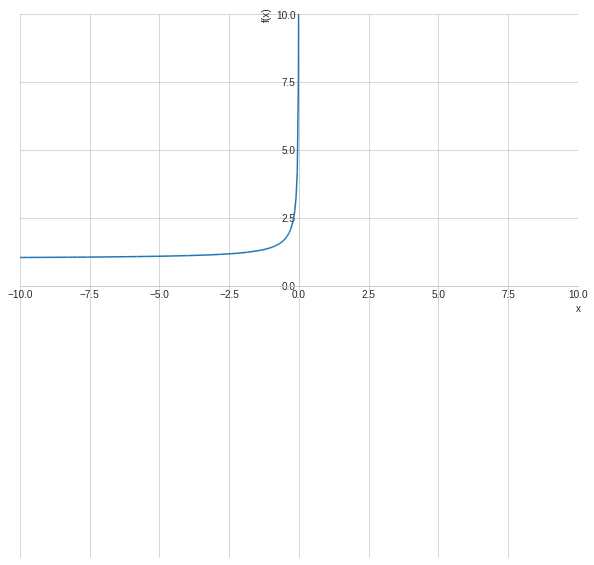

$f(x)=\sqrt{\frac{x-1}{x}}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, 0\right) \cup \left[1, \infty\right)$

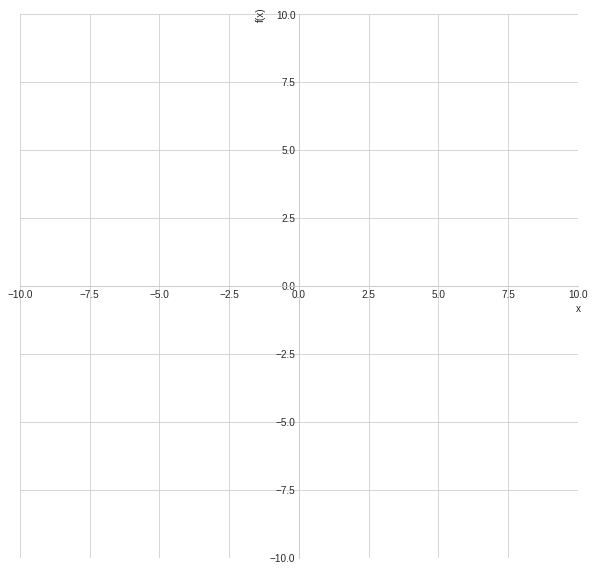

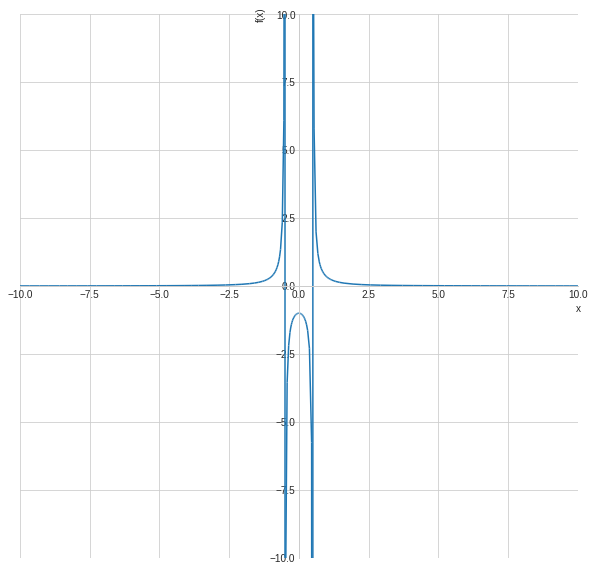

$f(x)=\frac{1}{4x^2-1}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, - \frac{1}{2}\right) \cup \left(- \frac{1}{2}, \frac{1}{2}\right) \cup \left(\frac{1}{2}, \infty\right)$

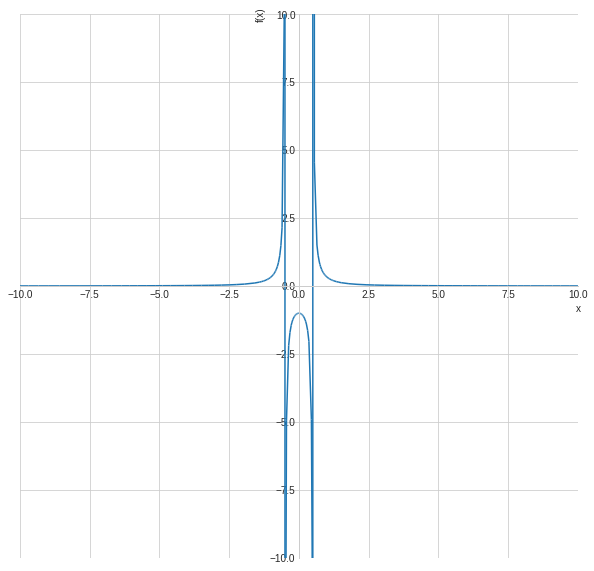

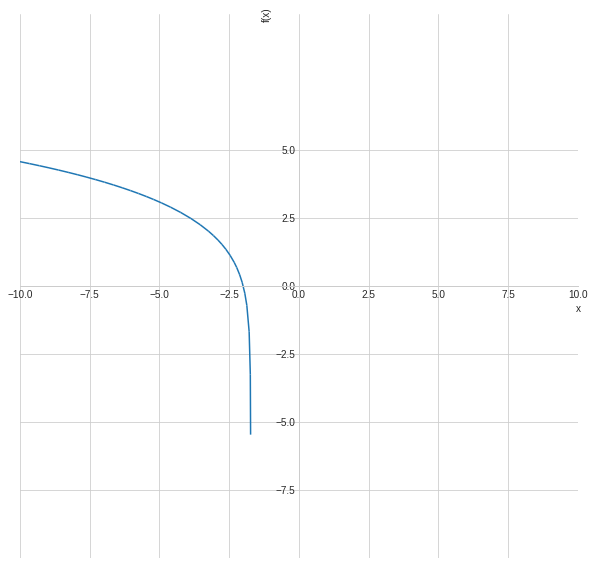

$f(x)=\ln{x^2-3}$ $ \rightarrow $$Dom\left(f \right)=\left(-\infty, - \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$

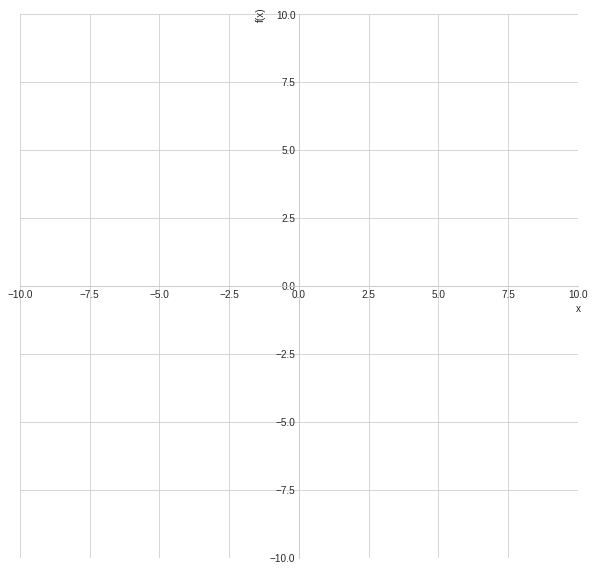

In [3]:
puntuacion = '1' 


# r'0x+3',r'x^3-5x^2+2',r'\frac{{x - 3}}{{x + 2}}', r'2x-3', r'2-\frac{2}{x-1}',r'\frac{x+1}{\sqrt{x^2+1}}'
                      
datos = [[r'\frac{x+1}{\sqrt{x^2+1}}',r'\sqrt{\frac{x-1}{x}}',r'\frac{1}{4x^2-1}',r'\ln{x^2-3}']]


for i, s in enumerate(datos) : 
    n_ejercicio = 'ae01-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    texto_ejercicio = r"""Halla analíticamente el dominio de las siguientes funciones:"""
    
    display(md("**"+texto_ejercicio+"**"))
    
    for j, t in enumerate(s):
        enunciado_latex.append("$f(x)="+t+"$")
        enunciado.append(parse_latex(t))
        # voy por aquí

        
        sol = r"$Dom\left(f \right)="
        sol+=latex(continuous_domain(eval(str(parse_latex(t))),x,domain=S.Reals))+r"$"
        
        plt.rcParams['figure.figsize'] = 10,10
        p1 = plot(parse_latex(t),show=True, xlim=(-10,10), ylim=(-10,10))
        p1.save(n_ejercicio+"-"+str(j)+".png")
        #sol+=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(j))

        solucion.append(sol)
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))
        

        
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




In [4]:
puntuacion = '1'                          
                      
datos = [[r'x^3+2',r'\frac{{x + 1}}{{x - 3}}',r'\sqrt{x-1}'],]

# vectores iniciales correspondientes al texto del enunciado

for i, s in enumerate(datos) : 
    n_ejercicio = 'ae02-'+str(i)
    enunciado_latex, enunciado, solucion = [],[],[]
    
    texto_ejercicio = r"""Dadas las funciones $f(x)= {}$, $g(x)= {}$ y $h(x)= {}$. Calcula: 
    """.format(datos[i][0],datos[i][1],datos[i][2])
    
    display(md("**"+texto_ejercicio+"**"))
    
    f = Lambda(x,eval(str(parse_latex(s[0]))))
    g = Lambda(x,eval(str(parse_latex(s[1]))))
    h = Lambda(x,eval(str(parse_latex(s[2]))))
    
    apartados = [[r'g \circ f','g(f(x))'],[r'f \circ g','f(g(x))'],[r'h \circ g \circ f','h(g(f(x)))']]
    
    for j, t in enumerate(apartados):
        enunciado_latex.append("$"+t[0]+"$")
        enunciado.append(t[1])


        sol = r"$"+latex(S(t[1]))+"="
        sol+=latex(simplify(eval(t[1])))+r"$"
        solucion.append(sol)
        display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))
        

        
    df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




**Dadas las funciones $f(x)= x^3+2$, $g(x)= \frac{{x + 1}}{{x - 3}}$ y $h(x)= \sqrt{x-1}$. Calcula: 
    **

$g \circ f$ $ \rightarrow $$g{\left(f{\left(x \right)} \right)}=\frac{x^{3} + 3}{x^{3} - 1}$

$f \circ g$ $ \rightarrow $$f{\left(g{\left(x \right)} \right)}=2 + \frac{\left(x + 1\right)^{3}}{\left(x - 3\right)^{3}}$

$h \circ g \circ f$ $ \rightarrow $$h{\left(g{\left(f{\left(x \right)} \right)} \right)}=2 \sqrt{\frac{1}{x^{3} - 1}}$

**Halla la función inversa de $f(x)$, siendo:**

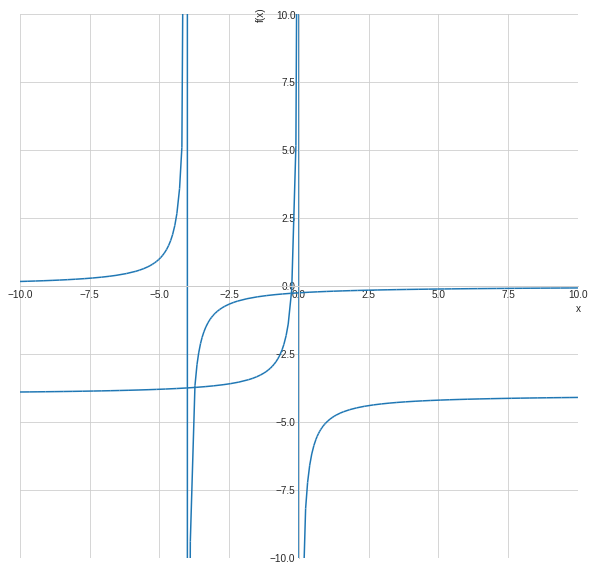

$f(x)=- \frac{1}{x + 4}$ $ \rightarrow $$f^{-1}(x)=-4 - \frac{1}{x}$ \\ $f^{-1} \circ f(x)=x=x$ \\

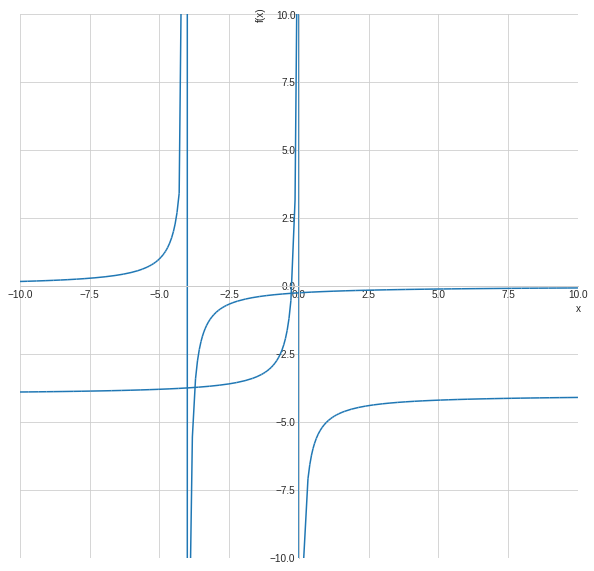

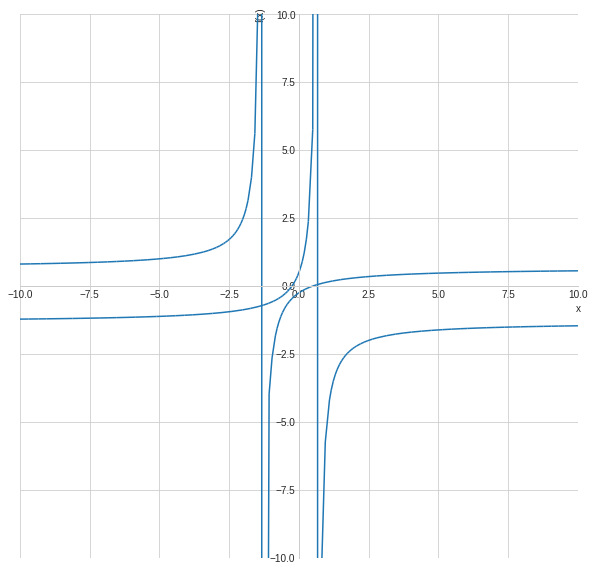

$f(x)=\frac{2 x - 1}{3 x + 4}$ $ \rightarrow $$f^{-1}(x)=- \frac{4 x + 1}{3 x - 2}$ \\ $f^{-1} \circ f(x)=\frac{- \frac{4 \left(2 x - 1\right)}{3 x + 4} - 1}{\frac{3 \left(2 x - 1\right)}{3 x + 4} - 2}=x$ \\

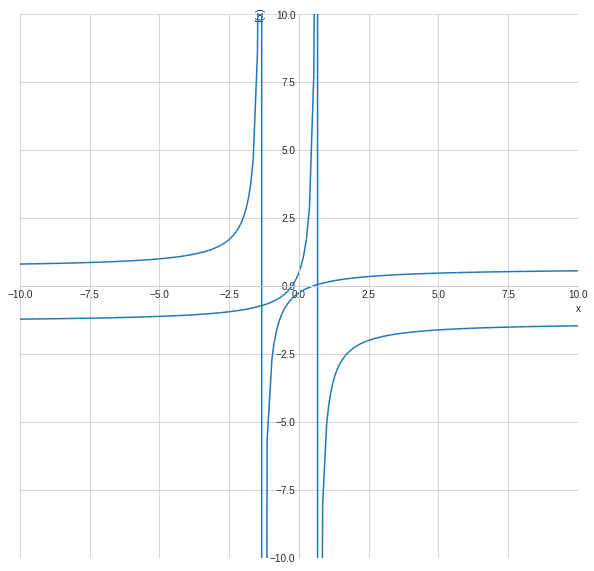

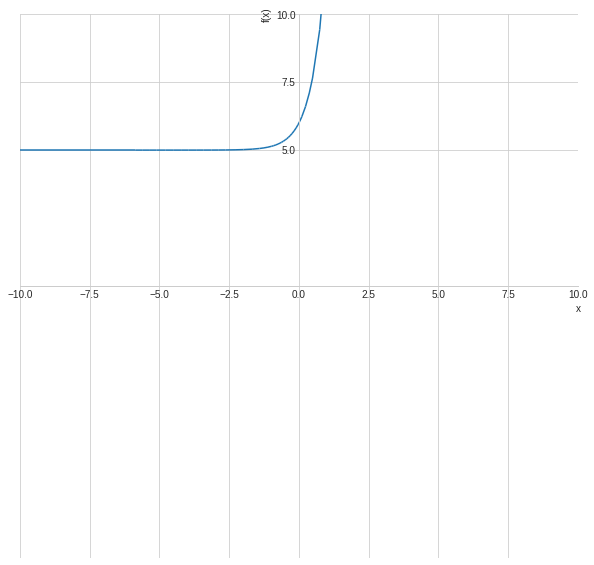

$f(x)=E^{2 x} + 5$ $ \rightarrow $$f^{-1}(x)=\log{\left(- \sqrt{x - 5} \right)}$ \\ $f^{-1} \circ f(x)=\log{\left(- e^{x} \right)}=x + i \pi$ \\

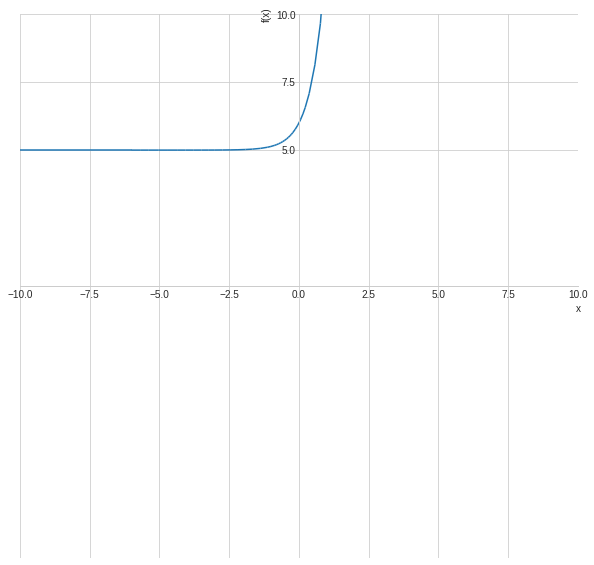

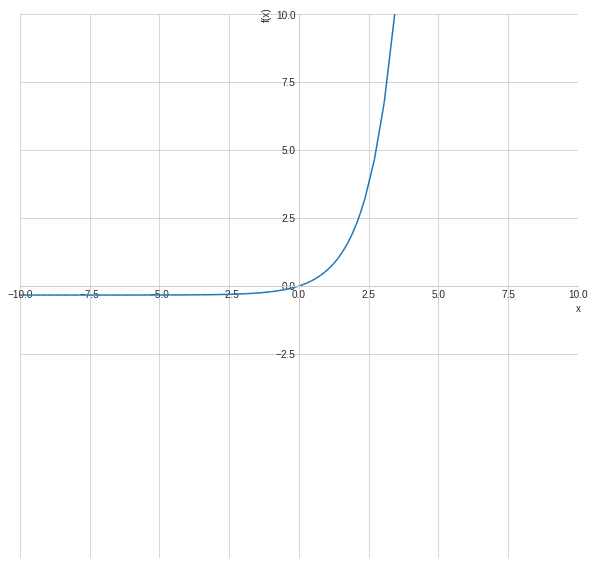

$f(x)=\log{\left(3 x + 1 \right)}$ $ \rightarrow $$f^{-1}(x)=\frac{e^{x}}{3} - \frac{1}{3}$ \\ $f^{-1} \circ f(x)=x=x$ \\

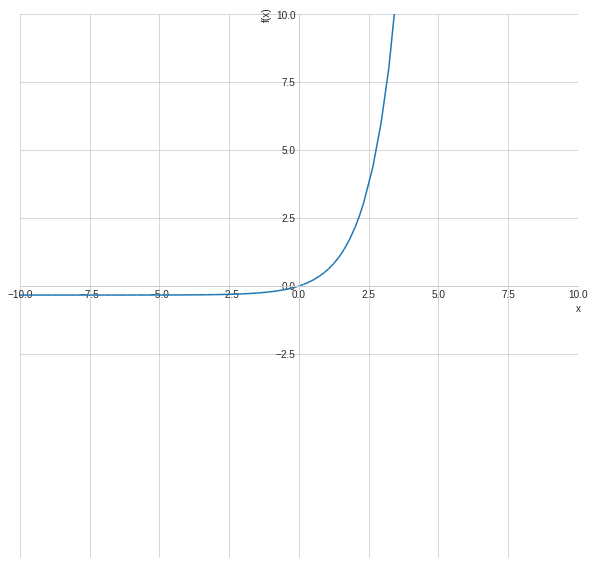

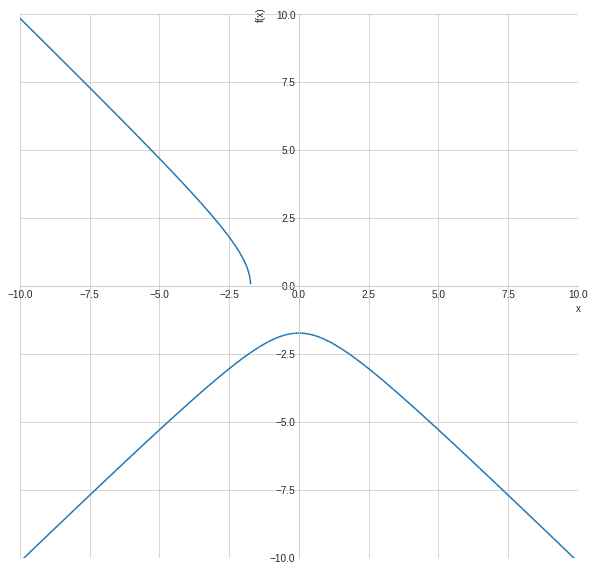

$f(x)=\sqrt{x^{2} - 3}$ $ \rightarrow $$f^{-1}(x)=- \sqrt{x^{2} + 3}$ \\ $f^{-1} \circ f(x)=- \left|{x}\right|=- \left|{x}\right|$ \\

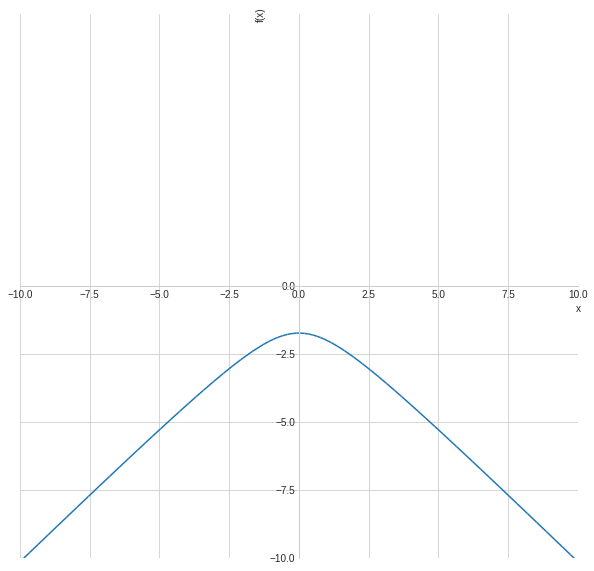

In [5]:
puntuacion = '1'                          
                      
datos = [r'\frac{{- 1}}{{x + 4}}',r'\frac{{2x - 1}}{{3x + 4}}',r'5+\E^{2x}',r'\ln{3x+1}',r'\sqrt{x^2-3}']

# vectores iniciales correspondientes al texto del enunciado
n_ejercicio = 'ae03'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Halla la función inversa de $f(x)$, siendo:"""
display(md("**"+texto_ejercicio+"**"))

for i, s in enumerate(datos) : 
    
    enunciado_latex.append("$f(x)="+latex(parse_latex(s))+"$")
    enunciado.append(s)
    
    inv = solve(S('x')-eval(str(parse_latex(s))).subs([(x,y)]),y)[0]
    f = Lambda(x,eval(str(parse_latex(s))))
    g = Lambda(x,eval(str(inv)))
    
    #display(f(x),g(x), f(g(x)), g(f(x)))
    sol = r"$f^{-1}(x)="
    sol+=latex(inv)+r"$ \\ $f^{-1} \circ f(x)="+ latex(g(f(x)))+ "=" + latex(simplify(g(f(x)))) + r"$ \\"
    
    plt.rcParams['figure.figsize'] = 10,10
    p1 = plot(f(x),g(x),show=True, xlim=(-10,10), ylim=(-10,10))
    p1.save(n_ejercicio+"-"+str(i)+".png")
    #sol+=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(i))
    
       
    
    solucion.append(sol)
    display(md(enunciado_latex[i] +" $ \\rightarrow $" + solucion[i] ))
        
df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




**Halla la función inversa de $f(x)$, y comprueba el resultado, siendo:**

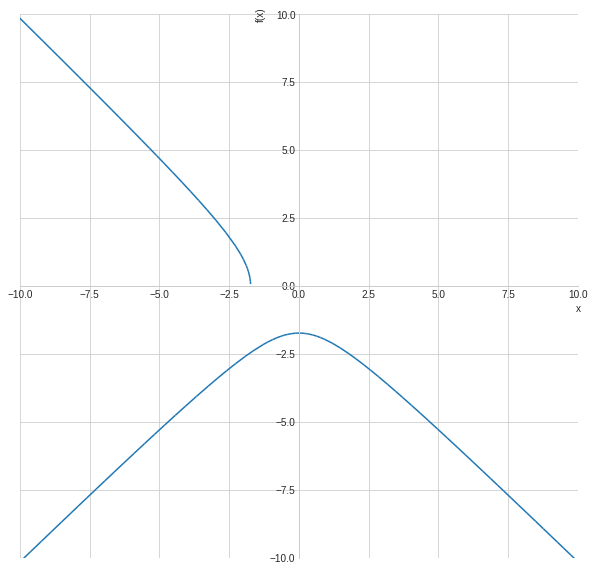

$f(x)=\sqrt{x^{2} - 3}$ $ \rightarrow $$f^{-1}(x)=- \sqrt{x^{2} + 3}$ \\ $f^{-1} \circ f(x)=- \left|{x}\right|=- \left|{x}\right|$ \\

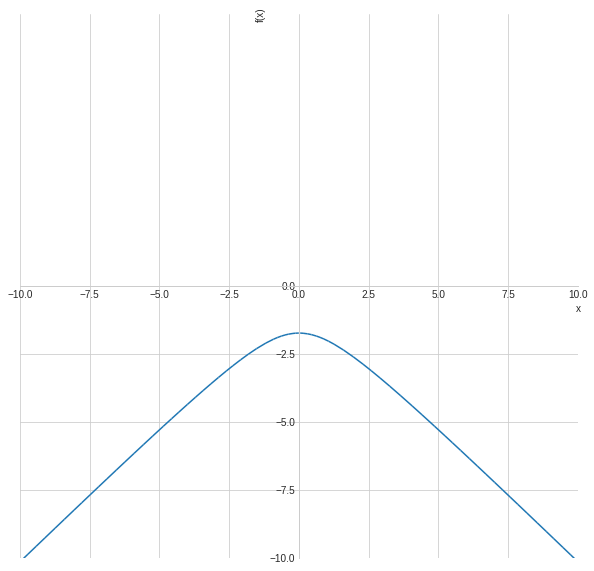

In [6]:
puntuacion = '1'                          
                      
datos = [r'\sqrt{x^2-3}']

# vectores iniciales correspondientes al texto del enunciado
n_ejercicio = 'ae03'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Halla la función inversa de $f(x)$, y comprueba el resultado, siendo:"""
display(md("**"+texto_ejercicio+"**"))

for i, s in enumerate(datos) : 
    
    enunciado_latex.append("$f(x)="+latex(parse_latex(s))+"$")
    enunciado.append(s)
    
    #inv = solve(S('x')-eval(str(parse_latex(s))).subs([(x,y)]),y)[0]
    inv = solve(S('x')-eval(str(parse_latex(s))).subs([(x,y)]),y)[0]
    f = Lambda(x,eval(str(parse_latex(s))))
    g = Lambda(x,eval(str(inv)))
    
    #display(f(x),g(x), f(g(x)), g(f(x)))
    sol = r"$f^{-1}(x)="
    sol+=latex(inv)+r"$ \\ $f^{-1} \circ f(x)="+ latex(g(f(x)))+ "=" + latex(simplify(g(f(x)))) + r"$ \\"
    
    plt.rcParams['figure.figsize'] = 10,10
    p1 = plot(f(x),g(x),show=True, xlim=(-10,10), ylim=(-10,10))
    p1.save(n_ejercicio+"-"+str(i)+".png")
    #sol+=r"\\ \resizebox{0.4\textwidth}{!}{\includegraphics[width=1\columnwidth]{%s}}" % (n_ejercicio+"-"+str(i))
    
       
    
    solucion.append(sol)
    display(md(enunciado_latex[i] +" $ \\rightarrow $" + solucion[i] ))
        
df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




In [7]:
puntuacion = '1'                          
                      
datos =  [  
    
    
    
            [(2*x**2 - 14*x + 12)/(x**2-10*x+4),oo],
            [((2*x**2 -3)*(5*x-4))/(2*x**3-2*x*2+1),oo],
           
            [(x**2-1)/(x**2+3*x+2),-1],
           
            [(2*x**3+6*x**2-3*x)/(2*x**2+5*x),0],
            [(2*x**3+6*x**2-3*x)/(2*x**2+5*x),oo],
            [(2*x**3+6*x**2-3*x)/(2*x**2+5*x),-oo],
            [((4*x**2-x+3)/(3*x**2+x-3))**(x/(1-x)),-oo],
            [sqrt(x**3+x+1)-x,oo],
            [((x**2+3)/(3*x**2-5))**(x**2/(2-x)),oo],
            [(x-2)**(1/(x-3)),3],
    
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'ae04'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Calcula los siguientes límites:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$'+latex(Limit(t[0],x,t[1],dir='+-'))+r'$$')
    enunciado.append(Limit(t[0],x,t[1],dir='+-'))
   
    
    if  limit(t[0],x,t[1],dir='-') == limit(t[0],x,t[1],dir='+'):      
        sol=r"$"+latex(limit(t[0],x,t[1],dir='+-'))+r"$"
    else:
        sol = r"No existe el límite"
    
    solucion.append(sol)
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '3', enun_tex=False, sol_tex=False), ignore_index=True)




**Calcula los siguientes límites:
**

$$\lim_{x \to \infty}\left(\frac{2 x^{2} - 14 x + 12}{x^{2} - 10 x + 4}\right)$$ $ \rightarrow $$2$

$$\lim_{x \to \infty}\left(\frac{\left(5 x - 4\right) \left(2 x^{2} - 3\right)}{2 x^{3} - 4 x + 1}\right)$$ $ \rightarrow $$5$

$$\lim_{x \to -1}\left(\frac{x^{2} - 1}{x^{2} + 3 x + 2}\right)$$ $ \rightarrow $$-2$

$$\lim_{x \to 0}\left(\frac{2 x^{3} + 6 x^{2} - 3 x}{2 x^{2} + 5 x}\right)$$ $ \rightarrow $$- \frac{3}{5}$

$$\lim_{x \to \infty}\left(\frac{2 x^{3} + 6 x^{2} - 3 x}{2 x^{2} + 5 x}\right)$$ $ \rightarrow $$\infty$

$$\lim_{x \to -\infty}\left(\frac{2 x^{3} + 6 x^{2} - 3 x}{2 x^{2} + 5 x}\right)$$ $ \rightarrow $$-\infty$

$$\lim_{x \to -\infty} \left(\frac{4 x^{2} - x + 3}{3 x^{2} + x - 3}\right)^{\frac{x}{1 - x}}$$ $ \rightarrow $$\frac{3}{4}$

$$\lim_{x \to \infty}\left(- x + \sqrt{x^{3} + x + 1}\right)$$ $ \rightarrow $$\infty$

$$\lim_{x \to \infty} \left(\frac{x^{2} + 3}{3 x^{2} - 5}\right)^{\frac{x^{2}}{2 - x}}$$ $ \rightarrow $$\infty$

$$\lim_{x \to 3} \left(x - 2\right)^{\frac{1}{x - 3}}$$ $ \rightarrow $$e$

In [8]:
puntuacion = '1'                          
                      
datos =  [  
        Piecewise((-2*x+1,x<-2),(a*x+2,x<2),(x**2+b,True)),
            
            
            
         ]
        


n_ejercicio = 'ae05: '
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Halla a y b de modo que las siguientes funciones sean continuas:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
    enunciado.append(t)
    sol = solve([trozos(t)[0][1]-trozos(t)[0][2],trozos(t)[1][1]-trozos(t)[1][2]])
    solucion.append(r"$"+latex(sol)+r"$")
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))
    
dato = Piecewise((log(x),x<1),(a*x**2+b,True))
enunciado_latex.append(r'$$f(x)='+latex(dato)+r'$$')
enunciado.append(dato)
sol = solveset(trozos(dato)[0][1]-trozos(dato)[0][2],a)
solucion.append(r"$"+latex(sol)+r"$")
    


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




**Halla a y b de modo que las siguientes funciones sean continuas:
**

$$f(x)=\begin{cases} 1 - 2 x & \text{for}\: x < -2 \\a x + 2 & \text{for}\: x < 2 \\b + x^{2} & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{ a : - \frac{3}{2}, \  b : -5\right\}$

In [9]:
puntuacion = '1'                          
                      
datos =  [  
            
            Piecewise((E**(k*x)/(x**2+2),x<0),(x**2+2*k*x+k,True)),
            Piecewise((log(x),x<=1),(k*x**2+2,True)),
            Piecewise((x**2+k*x,x<=-2),(k-x**2,True)),
            
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'ae06: '
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Calcula el valor de k para que las siguientes funciones sean continuas:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$$f(x)='+latex(t)+r'$$')
    enunciado.append(t)
    sol = solveset(trozos(t)[0][1]-trozos(t)[0][2],k)
    solucion.append(r"$"+latex(sol)+r"$")
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




**Calcula el valor de k para que las siguientes funciones sean continuas:
**

$$f(x)=\begin{cases} \frac{e^{k x}}{x^{2} + 2} & \text{for}\: x < 0 \\2 k x + k + x^{2} & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{\frac{1}{2}\right\}$

$$f(x)=\begin{cases} \log{\left(x \right)} & \text{for}\: x \leq 1 \\k x^{2} + 2 & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{-2\right\}$

$$f(x)=\begin{cases} k x + x^{2} & \text{for}\: x \leq -2 \\k - x^{2} & \text{otherwise} \end{cases}$$ $ \rightarrow $$\left\{\frac{8}{3}\right\}$

In [10]:
puntuacion = '1'                          
                      
datos =  [  
    (2*x-4)/(x+2),
    (x**2-3)/(x-2)
    
    
                
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'ae07'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Calcula las asíntotas de las funciones:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$'+latex(t)+r'$')
    enunciado.append(t)
    solucion.append(asintotas(t)[1])
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '3', enun_tex=False, sol_tex=False), ignore_index=True)



**Calcula las asíntotas de las funciones:
**

$\frac{2 x - 4}{x + 2}$ $ \rightarrow $Asíntotas:\\$x=-2$\\$y=2$\\$y=2$\\$y=2$ \\$y=2$ \\

$\frac{x^{2} - 3}{x - 2}$ $ \rightarrow $Asíntotas:\\$x=2$\\$y=x + 2$ \\$y=x + 2$ \\

In [11]:
puntuacion = '1'                          
                      
datos =  [ 
            '2*x**5-x**2+5*x+2', '(x)*(x+2)*(x+3)',
            'x**3/sqrt(x**2-x)', 'x**4*x**(1/4)',
            'sqrt(x**3)/x','(1-x**2)**4', 'cbrt(2*x**2+5*x+7)',
            'sqrt((2-x)/(2+x))', 'E**(sin(x))',
            '2**(5*cos(x))', '8**(3*tan(x)**2-1)', 'log((2*x-1)/(1+2*x))',
            'cos(x**3+1)**3','tan(5*x)**3', 'log(sin(1-x))','cbrt(sin(x))','(sin(x)**4)*cos(x)',
            '2**(log(cos(x)))','(x**2)**(log(cos(x)))','cos(x)**E**(x)','x**tan(x)',
            '(cos(x))**(1/x)'
   
         ]
        

# vectores iniciales correspondientes al texto del enunciado

n_ejercicio = 'ae08'
enunciado_latex, enunciado, solucion = [],[],[]

texto_ejercicio = r"""Calcula las siguientes derivadas:
"""

display(md("**"+texto_ejercicio+"**"))

for j, t in enumerate(datos):
    enunciado_latex.append(r'$y='+latex(S(t,evaluate=False))+r'$')
    enunciado.append(r'diff('+str(nsimplify(S(t)))+r')')
    #display(S(t),diff(S(t)))
    sol=r"$y'="+latex((diff(S(t))))+r"$"
    solucion.append(sol)
    display(md(enunciado_latex[j] +" $ \\rightarrow $" + solucion[j] ))


df_ejercicios = df_ejercicios.append(añadir_ejercicios(enunciado_latex, enunciado, solucion, texto_ejercicio, curso, titulo , n_ejercicio, '5', '2', enun_tex=False, sol_tex=False), ignore_index=True)




**Calcula las siguientes derivadas:
**

$y=2 x^{5} - x^{2} + 5 x + 2$ $ \rightarrow $$y'=10 x^{4} - 2 x + 5$

$y=x \left(x + 2\right) \left(x + 3\right)$ $ \rightarrow $$y'=x \left(x + 2\right) + x \left(x + 3\right) + \left(x + 2\right) \left(x + 3\right)$

$y=\frac{x^{3}}{\sqrt{x^{2} - x}}$ $ \rightarrow $$y'=\frac{x^{3} \left(\frac{1}{2} - x\right)}{\left(x^{2} - x\right)^{\frac{3}{2}}} + \frac{3 x^{2}}{\sqrt{x^{2} - x}}$

$y=x^{4} x^{\frac{1}{4}}$ $ \rightarrow $$y'=\frac{17 x^{\frac{13}{4}}}{4}$

$y=\frac{\sqrt{x^{3}}}{x}$ $ \rightarrow $$y'=\frac{\sqrt{x^{3}}}{2 x^{2}}$

$y=\left(1 - x^{2}\right)^{4}$ $ \rightarrow $$y'=- 8 x \left(1 - x^{2}\right)^{3}$

$y=\sqrt[3]{2 x^{2} + 5 x + 7}$ $ \rightarrow $$y'=\frac{\frac{4 x}{3} + \frac{5}{3}}{\left(2 x^{2} + 5 x + 7\right)^{\frac{2}{3}}}$

$y=\sqrt{\frac{2 - x}{x + 2}}$ $ \rightarrow $$y'=\frac{\sqrt{\frac{2 - x}{x + 2}} \left(x + 2\right) \left(- \frac{2 - x}{2 \left(x + 2\right)^{2}} - \frac{1}{2 \left(x + 2\right)}\right)}{2 - x}$

$y=e^{\sin{\left(x \right)}}$ $ \rightarrow $$y'=e^{\sin{\left(x \right)}} \cos{\left(x \right)}$

$y=2^{5 \cos{\left(x \right)}}$ $ \rightarrow $$y'=- 5 \cdot 2^{5 \cos{\left(x \right)}} \log{\left(2 \right)} \sin{\left(x \right)}$

$y=8^{3 \tan^{2}{\left(x \right)} - 1}$ $ \rightarrow $$y'=3 \cdot 8^{3 \tan^{2}{\left(x \right)} - 1} \left(2 \tan^{2}{\left(x \right)} + 2\right) \log{\left(8 \right)} \tan{\left(x \right)}$

$y=\log{\left(\frac{2 x - 1}{2 x + 1} \right)}$ $ \rightarrow $$y'=\frac{\left(2 x + 1\right) \left(- \frac{2 \left(2 x - 1\right)}{\left(2 x + 1\right)^{2}} + \frac{2}{2 x + 1}\right)}{2 x - 1}$

$y=\cos^{3}{\left(x^{3} + 1 \right)}$ $ \rightarrow $$y'=- 9 x^{2} \sin{\left(x^{3} + 1 \right)} \cos^{2}{\left(x^{3} + 1 \right)}$

$y=\tan^{3}{\left(5 x \right)}$ $ \rightarrow $$y'=\left(15 \tan^{2}{\left(5 x \right)} + 15\right) \tan^{2}{\left(5 x \right)}$

$y=\log{\left(- \sin{\left(x - 1 \right)} \right)}$ $ \rightarrow $$y'=\frac{\cos{\left(x - 1 \right)}}{\sin{\left(x - 1 \right)}}$

$y=\sqrt[3]{\sin{\left(x \right)}}$ $ \rightarrow $$y'=\frac{\cos{\left(x \right)}}{3 \sin^{\frac{2}{3}}{\left(x \right)}}$

$y=\sin^{4}{\left(x \right)} \cos{\left(x \right)}$ $ \rightarrow $$y'=- \sin^{5}{\left(x \right)} + 4 \sin^{3}{\left(x \right)} \cos^{2}{\left(x \right)}$

$y=2^{\log{\left(\cos{\left(x \right)} \right)}}$ $ \rightarrow $$y'=- \frac{2^{\log{\left(\cos{\left(x \right)} \right)}} \log{\left(2 \right)} \sin{\left(x \right)}}{\cos{\left(x \right)}}$

$y=\left(x^{2}\right)^{\log{\left(\cos{\left(x \right)} \right)}}$ $ \rightarrow $$y'=\left(- \frac{\log{\left(x^{2} \right)} \sin{\left(x \right)}}{\cos{\left(x \right)}} + \frac{2 \log{\left(\cos{\left(x \right)} \right)}}{x}\right) \left(x^{2}\right)^{\log{\left(\cos{\left(x \right)} \right)}}$

$y=\cos^{e^{x}}{\left(x \right)}$ $ \rightarrow $$y'=\left(e^{x} \log{\left(\cos{\left(x \right)} \right)} - \frac{e^{x} \sin{\left(x \right)}}{\cos{\left(x \right)}}\right) \cos^{e^{x}}{\left(x \right)}$

$y=x^{\tan{\left(x \right)}}$ $ \rightarrow $$y'=x^{\tan{\left(x \right)}} \left(\left(\tan^{2}{\left(x \right)} + 1\right) \log{\left(x \right)} + \frac{\tan{\left(x \right)}}{x}\right)$

$y=\cos^{\frac{1}{x}}{\left(x \right)}$ $ \rightarrow $$y'=\left(- \frac{\sin{\left(x \right)}}{x \cos{\left(x \right)}} - \frac{\log{\left(\cos{\left(x \right)} \right)}}{x^{2}}\right) \cos^{\frac{1}{x}}{\left(x \right)}$

In [12]:
df_ejercicios

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,$f(x)=\frac{x+1}{\sqrt{x^2+1}}$,(x + 1)/sqrt(x**2 + 1),"$Dom\left(f \right)=\left(-\infty, \infty\right)$",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
1,$f(x)=\sqrt{\frac{x-1}{x}}$,sqrt((x - 1)/x),"$Dom\left(f \right)=\left(-\infty, 0\right) \c...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
2,$f(x)=\frac{1}{4x^2-1}$,1/(4*x**2 - 1),"$Dom\left(f \right)=\left(-\infty, - \frac{1}{...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
3,$f(x)=\ln{x^2-3}$,"log(x**2 - 3, E)","$Dom\left(f \right)=\left(-\infty, - \sqrt{3}\...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
4,$g \circ f$,g(f(x)),$g{\left(f{\left(x \right)} \right)}=\frac{x^{...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
5,$f \circ g$,f(g(x)),$f{\left(g{\left(x \right)} \right)}=2 + \frac...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
6,$h \circ g \circ f$,h(g(f(x))),$h{\left(g{\left(f{\left(x \right)} \right)} \...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
7,$f(x)=- \frac{1}{x + 4}$,\frac{{- 1}}{{x + 4}},$f^{-1}(x)=-4 - \frac{1}{x}$ \\ $f^{-1} \circ ...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
8,$f(x)=\frac{2 x - 1}{3 x + 4}$,\frac{{2x - 1}}{{3x + 4}},$f^{-1}(x)=- \frac{4 x + 1}{3 x - 2}$ \\ $f^{-...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
9,$f(x)=E^{2 x} + 5$,5+\E^{2x},$f^{-1}(x)=\log{\left(- \sqrt{x - 5} \right)}$...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False


In [13]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **ae01-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,$f(x)=\frac{x+1}{\sqrt{x^2+1}}$,(x + 1)/sqrt(x**2 + 1),"$Dom\left(f \right)=\left(-\infty, \infty\right)$",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
1,$f(x)=\sqrt{\frac{x-1}{x}}$,sqrt((x - 1)/x),"$Dom\left(f \right)=\left(-\infty, 0\right) \c...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
2,$f(x)=\frac{1}{4x^2-1}$,1/(4*x**2 - 1),"$Dom\left(f \right)=\left(-\infty, - \frac{1}{...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
3,$f(x)=\ln{x^2-3}$,"log(x**2 - 3, E)","$Dom\left(f \right)=\left(-\infty, - \sqrt{3}\...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False


**Ejercicio: **ae02-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
4,$g \circ f$,g(f(x)),$g{\left(f{\left(x \right)} \right)}=\frac{x^{...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
5,$f \circ g$,f(g(x)),$f{\left(g{\left(x \right)} \right)}=2 + \frac...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
6,$h \circ g \circ f$,h(g(f(x))),$h{\left(g{\left(f{\left(x \right)} \right)} \...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False


**Ejercicio: **ae03

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
7,$f(x)=- \frac{1}{x + 4}$,\frac{{- 1}}{{x + 4}},$f^{-1}(x)=-4 - \frac{1}{x}$ \\ $f^{-1} \circ ...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
8,$f(x)=\frac{2 x - 1}{3 x + 4}$,\frac{{2x - 1}}{{3x + 4}},$f^{-1}(x)=- \frac{4 x + 1}{3 x - 2}$ \\ $f^{-...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
9,$f(x)=E^{2 x} + 5$,5+\E^{2x},$f^{-1}(x)=\log{\left(- \sqrt{x - 5} \right)}$...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
10,$f(x)=\log{\left(3 x + 1 \right)}$,\ln{3x+1},$f^{-1}(x)=\frac{e^{x}}{3} - \frac{1}{3}$ \\ $...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
11,$f(x)=\sqrt{x^{2} - 3}$,\sqrt{x^2-3},$f^{-1}(x)=- \sqrt{x^{2} + 3}$ \\ $f^{-1} \cir...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
12,$f(x)=\sqrt{x^{2} - 3}$,\sqrt{x^2-3},$f^{-1}(x)=- \sqrt{x^{2} + 3}$ \\ $f^{-1} \cir...,"Halla la función inversa de $f(x)$, y comprueb...",1BC,Autoevaluación,ae03,5,2,1,False,False


**Ejercicio: **ae04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
13,$$\lim_{x \to \infty}\left(\frac{2 x^{2} - 14 ...,"Limit((2*x**2 - 14*x + 12)/(x**2 - 10*x + 4), ...",$2$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
14,$$\lim_{x \to \infty}\left(\frac{\left(5 x - 4...,Limit((5*x - 4)*(2*x**2 - 3)/(2*x**3 - 4*x + 1...,$5$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
15,$$\lim_{x \to -1}\left(\frac{x^{2} - 1}{x^{2} ...,"Limit((x**2 - 1)/(x**2 + 3*x + 2), x, -1, dir=...",$-2$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
16,$$\lim_{x \to 0}\left(\frac{2 x^{3} + 6 x^{2} ...,"Limit((2*x**3 + 6*x**2 - 3*x)/(2*x**2 + 5*x), ...",$- \frac{3}{5}$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
17,$$\lim_{x \to \infty}\left(\frac{2 x^{3} + 6 x...,"Limit((2*x**3 + 6*x**2 - 3*x)/(2*x**2 + 5*x), ...",$\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
18,$$\lim_{x \to -\infty}\left(\frac{2 x^{3} + 6 ...,"Limit((2*x**3 + 6*x**2 - 3*x)/(2*x**2 + 5*x), ...",$-\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
19,$$\lim_{x \to -\infty} \left(\frac{4 x^{2} - x...,Limit(((4*x**2 - x + 3)/(3*x**2 + x - 3))**(x/...,$\frac{3}{4}$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
20,$$\lim_{x \to \infty}\left(- x + \sqrt{x^{3} +...,"Limit(-x + sqrt(x**3 + x + 1), x, oo, dir='-')",$\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
21,$$\lim_{x \to \infty} \left(\frac{x^{2} + 3}{3...,Limit(((x**2 + 3)/(3*x**2 - 5))**(x**2/(2 - x)...,$\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
22,$$\lim_{x \to 3} \left(x - 2\right)^{\frac{1}{...,"Limit((x - 2)**(1/(x - 3)), x, 3, dir='+-')",$e$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False


**Ejercicio: **ae05: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
23,$$f(x)=\begin{cases} 1 - 2 x & \text{for}\: x ...,"Piecewise((1 - 2*x, x < -2), (a*x + 2, x < 2),...","$\left\{ a : - \frac{3}{2}, \ b : -5\right\}$",Halla a y b de modo que las siguientes funcion...,1BC,Autoevaluación,ae05:,5,2,1,False,False
24,$$f(x)=\begin{cases} \log{\left(x \right)} & \...,"Piecewise((log(x), x < 1), (a*x**2 + b, True))",$\left\{- b\right\}$,Halla a y b de modo que las siguientes funcion...,1BC,Autoevaluación,ae05:,5,2,1,False,False


**Ejercicio: **ae06: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
25,$$f(x)=\begin{cases} \frac{e^{k x}}{x^{2} + 2}...,"Piecewise((exp(k*x)/(x**2 + 2), x < 0), (2*k*x...",$\left\{\frac{1}{2}\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Autoevaluación,ae06:,5,2,1,False,False
26,$$f(x)=\begin{cases} \log{\left(x \right)} & \...,"Piecewise((log(x), x <= 1), (k*x**2 + 2, True))",$\left\{-2\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Autoevaluación,ae06:,5,2,1,False,False
27,$$f(x)=\begin{cases} k x + x^{2} & \text{for}\...,"Piecewise((k*x + x**2, x <= -2), (k - x**2, Tr...",$\left\{\frac{8}{3}\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Autoevaluación,ae06:,5,2,1,False,False


**Ejercicio: **ae07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
28,$\frac{2 x - 4}{x + 2}$,(2*x - 4)/(x + 2),Asíntotas:\\$x=-2$\\$y=2$\\$y=2$\\$y=2$ \\$y=2...,Calcula las asíntotas de las funciones:\n,1BC,Autoevaluación,ae07,5,3,1,False,False
29,$\frac{x^{2} - 3}{x - 2}$,(x**2 - 3)/(x - 2),Asíntotas:\\$x=2$\\$y=x + 2$ \\$y=x + 2$ \\,Calcula las asíntotas de las funciones:\n,1BC,Autoevaluación,ae07,5,3,1,False,False


**Ejercicio: **ae08

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
30,$y=2 x^{5} - x^{2} + 5 x + 2$,diff(2*x**5 - x**2 + 5*x + 2),$y'=10 x^{4} - 2 x + 5$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
31,$y=x \left(x + 2\right) \left(x + 3\right)$,diff(x*(x + 2)*(x + 3)),$y'=x \left(x + 2\right) + x \left(x + 3\right...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
32,$y=\frac{x^{3}}{\sqrt{x^{2} - x}}$,diff(x**3/sqrt(x**2 - x)),$y'=\frac{x^{3} \left(\frac{1}{2} - x\right)}{...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
33,$y=x^{4} x^{\frac{1}{4}}$,diff(x**(17/4)),$y'=\frac{17 x^{\frac{13}{4}}}{4}$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
34,$y=\frac{\sqrt{x^{3}}}{x}$,diff(sqrt(x**3)/x),$y'=\frac{\sqrt{x^{3}}}{2 x^{2}}$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
35,$y=\left(1 - x^{2}\right)^{4}$,diff((1 - x**2)**4),$y'=- 8 x \left(1 - x^{2}\right)^{3}$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
36,$y=\sqrt[3]{2 x^{2} + 5 x + 7}$,diff((2*x**2 + 5*x + 7)**(1/3)),$y'=\frac{\frac{4 x}{3} + \frac{5}{3}}{\left(2...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
37,$y=\sqrt{\frac{2 - x}{x + 2}}$,diff(sqrt((2 - x)/(x + 2))),$y'=\frac{\sqrt{\frac{2 - x}{x + 2}} \left(x +...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
38,$y=e^{\sin{\left(x \right)}}$,diff(exp(sin(x))),$y'=e^{\sin{\left(x \right)}} \cos{\left(x \ri...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
39,$y=2^{5 \cos{\left(x \right)}}$,diff(2**(5*cos(x))),$y'=- 5 \cdot 2^{5 \cos{\left(x \right)}} \log...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False


In [14]:
escribir_preambulo(fichero, titulo, 'ejercicios')
for s in df_ejercicios.groupby('n_ejercicio').count().index : 
    display(md("**Ejercicio: **" + s ))
    display(df_ejercicios[df_ejercicios.n_ejercicio == s])
    escribir_ejercicios(df_ejercicios[df_ejercicios.n_ejercicio == s],fichero)

escribir_fin(fichero)

**Ejercicio: **ae01-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
0,$f(x)=\frac{x+1}{\sqrt{x^2+1}}$,(x + 1)/sqrt(x**2 + 1),"$Dom\left(f \right)=\left(-\infty, \infty\right)$",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
1,$f(x)=\sqrt{\frac{x-1}{x}}$,sqrt((x - 1)/x),"$Dom\left(f \right)=\left(-\infty, 0\right) \c...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
2,$f(x)=\frac{1}{4x^2-1}$,1/(4*x**2 - 1),"$Dom\left(f \right)=\left(-\infty, - \frac{1}{...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False
3,$f(x)=\ln{x^2-3}$,"log(x**2 - 3, E)","$Dom\left(f \right)=\left(-\infty, - \sqrt{3}\...",Halla analíticamente el dominio de las siguien...,1BC,Autoevaluación,ae01-0,5,2,1,False,False


**Ejercicio: **ae02-0

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
4,$g \circ f$,g(f(x)),$g{\left(f{\left(x \right)} \right)}=\frac{x^{...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
5,$f \circ g$,f(g(x)),$f{\left(g{\left(x \right)} \right)}=2 + \frac...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False
6,$h \circ g \circ f$,h(g(f(x))),$h{\left(g{\left(f{\left(x \right)} \right)} \...,"Dadas las funciones $f(x)= x^3+2$, $g(x)= \fra...",1BC,Autoevaluación,ae02-0,5,2,1,False,False


**Ejercicio: **ae03

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
7,$f(x)=- \frac{1}{x + 4}$,\frac{{- 1}}{{x + 4}},$f^{-1}(x)=-4 - \frac{1}{x}$ \\ $f^{-1} \circ ...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
8,$f(x)=\frac{2 x - 1}{3 x + 4}$,\frac{{2x - 1}}{{3x + 4}},$f^{-1}(x)=- \frac{4 x + 1}{3 x - 2}$ \\ $f^{-...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
9,$f(x)=E^{2 x} + 5$,5+\E^{2x},$f^{-1}(x)=\log{\left(- \sqrt{x - 5} \right)}$...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
10,$f(x)=\log{\left(3 x + 1 \right)}$,\ln{3x+1},$f^{-1}(x)=\frac{e^{x}}{3} - \frac{1}{3}$ \\ $...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
11,$f(x)=\sqrt{x^{2} - 3}$,\sqrt{x^2-3},$f^{-1}(x)=- \sqrt{x^{2} + 3}$ \\ $f^{-1} \cir...,"Halla la función inversa de $f(x)$, siendo:",1BC,Autoevaluación,ae03,5,2,1,False,False
12,$f(x)=\sqrt{x^{2} - 3}$,\sqrt{x^2-3},$f^{-1}(x)=- \sqrt{x^{2} + 3}$ \\ $f^{-1} \cir...,"Halla la función inversa de $f(x)$, y comprueb...",1BC,Autoevaluación,ae03,5,2,1,False,False


**Ejercicio: **ae04

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
13,$$\lim_{x \to \infty}\left(\frac{2 x^{2} - 14 ...,"Limit((2*x**2 - 14*x + 12)/(x**2 - 10*x + 4), ...",$2$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
14,$$\lim_{x \to \infty}\left(\frac{\left(5 x - 4...,Limit((5*x - 4)*(2*x**2 - 3)/(2*x**3 - 4*x + 1...,$5$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
15,$$\lim_{x \to -1}\left(\frac{x^{2} - 1}{x^{2} ...,"Limit((x**2 - 1)/(x**2 + 3*x + 2), x, -1, dir=...",$-2$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
16,$$\lim_{x \to 0}\left(\frac{2 x^{3} + 6 x^{2} ...,"Limit((2*x**3 + 6*x**2 - 3*x)/(2*x**2 + 5*x), ...",$- \frac{3}{5}$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
17,$$\lim_{x \to \infty}\left(\frac{2 x^{3} + 6 x...,"Limit((2*x**3 + 6*x**2 - 3*x)/(2*x**2 + 5*x), ...",$\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
18,$$\lim_{x \to -\infty}\left(\frac{2 x^{3} + 6 ...,"Limit((2*x**3 + 6*x**2 - 3*x)/(2*x**2 + 5*x), ...",$-\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
19,$$\lim_{x \to -\infty} \left(\frac{4 x^{2} - x...,Limit(((4*x**2 - x + 3)/(3*x**2 + x - 3))**(x/...,$\frac{3}{4}$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
20,$$\lim_{x \to \infty}\left(- x + \sqrt{x^{3} +...,"Limit(-x + sqrt(x**3 + x + 1), x, oo, dir='-')",$\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
21,$$\lim_{x \to \infty} \left(\frac{x^{2} + 3}{3...,Limit(((x**2 + 3)/(3*x**2 - 5))**(x**2/(2 - x)...,$\infty$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False
22,$$\lim_{x \to 3} \left(x - 2\right)^{\frac{1}{...,"Limit((x - 2)**(1/(x - 3)), x, 3, dir='+-')",$e$,Calcula los siguientes límites:\n,1BC,Autoevaluación,ae04,5,3,1,False,False


**Ejercicio: **ae05: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
23,$$f(x)=\begin{cases} 1 - 2 x & \text{for}\: x ...,"Piecewise((1 - 2*x, x < -2), (a*x + 2, x < 2),...","$\left\{ a : - \frac{3}{2}, \ b : -5\right\}$",Halla a y b de modo que las siguientes funcion...,1BC,Autoevaluación,ae05:,5,2,1,False,False
24,$$f(x)=\begin{cases} \log{\left(x \right)} & \...,"Piecewise((log(x), x < 1), (a*x**2 + b, True))",$\left\{- b\right\}$,Halla a y b de modo que las siguientes funcion...,1BC,Autoevaluación,ae05:,5,2,1,False,False


**Ejercicio: **ae06: 

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
25,$$f(x)=\begin{cases} \frac{e^{k x}}{x^{2} + 2}...,"Piecewise((exp(k*x)/(x**2 + 2), x < 0), (2*k*x...",$\left\{\frac{1}{2}\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Autoevaluación,ae06:,5,2,1,False,False
26,$$f(x)=\begin{cases} \log{\left(x \right)} & \...,"Piecewise((log(x), x <= 1), (k*x**2 + 2, True))",$\left\{-2\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Autoevaluación,ae06:,5,2,1,False,False
27,$$f(x)=\begin{cases} k x + x^{2} & \text{for}\...,"Piecewise((k*x + x**2, x <= -2), (k - x**2, Tr...",$\left\{\frac{8}{3}\right\}$,Calcula el valor de k para que las siguientes ...,1BC,Autoevaluación,ae06:,5,2,1,False,False


**Ejercicio: **ae07

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
28,$\frac{2 x - 4}{x + 2}$,(2*x - 4)/(x + 2),Asíntotas:\\$x=-2$\\$y=2$\\$y=2$\\$y=2$ \\$y=2...,Calcula las asíntotas de las funciones:\n,1BC,Autoevaluación,ae07,5,3,1,False,False
29,$\frac{x^{2} - 3}{x - 2}$,(x**2 - 3)/(x - 2),Asíntotas:\\$x=2$\\$y=x + 2$ \\$y=x + 2$ \\,Calcula las asíntotas de las funciones:\n,1BC,Autoevaluación,ae07,5,3,1,False,False


**Ejercicio: **ae08

,enunciado_latex,enunciado,solucion,texto,curso,titulo,n_ejercicio,dificultad,n_columnas,puntos,enun_tex,sol_tex
30,$y=2 x^{5} - x^{2} + 5 x + 2$,diff(2*x**5 - x**2 + 5*x + 2),$y'=10 x^{4} - 2 x + 5$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
31,$y=x \left(x + 2\right) \left(x + 3\right)$,diff(x*(x + 2)*(x + 3)),$y'=x \left(x + 2\right) + x \left(x + 3\right...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
32,$y=\frac{x^{3}}{\sqrt{x^{2} - x}}$,diff(x**3/sqrt(x**2 - x)),$y'=\frac{x^{3} \left(\frac{1}{2} - x\right)}{...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
33,$y=x^{4} x^{\frac{1}{4}}$,diff(x**(17/4)),$y'=\frac{17 x^{\frac{13}{4}}}{4}$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
34,$y=\frac{\sqrt{x^{3}}}{x}$,diff(sqrt(x**3)/x),$y'=\frac{\sqrt{x^{3}}}{2 x^{2}}$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
35,$y=\left(1 - x^{2}\right)^{4}$,diff((1 - x**2)**4),$y'=- 8 x \left(1 - x^{2}\right)^{3}$,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
36,$y=\sqrt[3]{2 x^{2} + 5 x + 7}$,diff((2*x**2 + 5*x + 7)**(1/3)),$y'=\frac{\frac{4 x}{3} + \frac{5}{3}}{\left(2...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
37,$y=\sqrt{\frac{2 - x}{x + 2}}$,diff(sqrt((2 - x)/(x + 2))),$y'=\frac{\sqrt{\frac{2 - x}{x + 2}} \left(x +...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
38,$y=e^{\sin{\left(x \right)}}$,diff(exp(sin(x))),$y'=e^{\sin{\left(x \right)}} \cos{\left(x \ri...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
39,$y=2^{5 \cos{\left(x \right)}}$,diff(2**(5*cos(x))),$y'=- 5 \cdot 2^{5 \cos{\left(x \right)}} \log...,Calcula las siguientes derivadas:\n,1BC,Autoevaluación,ae08,5,2,1,False,False
